In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from sklearn import linear_model, tree, svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
%matplotlib inline

In [2]:
df = pd.read_csv('aggregate.csv', encoding = "ISO-8859-1")

In [3]:
df.tail(1)

,business_id,address,name,yelp_star,mean_star,review_count,demerit,grade,keyword_count,inspection_fail_count,inspection_fail_indicator,one_star_count,prop_one_star
9639,zzzaIBwimxVej4tY6qFOUQ,6728 W Cheyenne Ave,Guthrie's,3.5,3.432432,37,"[8, 2, 3]","['A', 'A', 'A']","{'sick': 1, 'dirty': 1, 'disgusting': 1, 'vomi...",0,0,4,0.108108


In [4]:
# create total keyword count column and split keyword_count into many columns
for i in range(len(df)):
    keywords = ast.literal_eval(df.at[i, 'keyword_count'])
    df.at[i, "keyword_total"] = sum(keywords.values())
    for word in keywords:
        df.at[i, word] = keywords[word]

In [5]:
df.tail(1)

,business_id,address,name,yelp_star,mean_star,review_count,demerit,grade,keyword_count,inspection_fail_count,...,contaminate,bacteria,salmonella,e coli,infest,retch,gag,stench,e-coli,tainted
9639,zzzaIBwimxVej4tY6qFOUQ,6728 W Cheyenne Ave,Guthrie's,3.5,3.432432,37,"[8, 2, 3]","['A', 'A', 'A']","{'sick': 1, 'dirty': 1, 'disgusting': 1, 'vomi...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


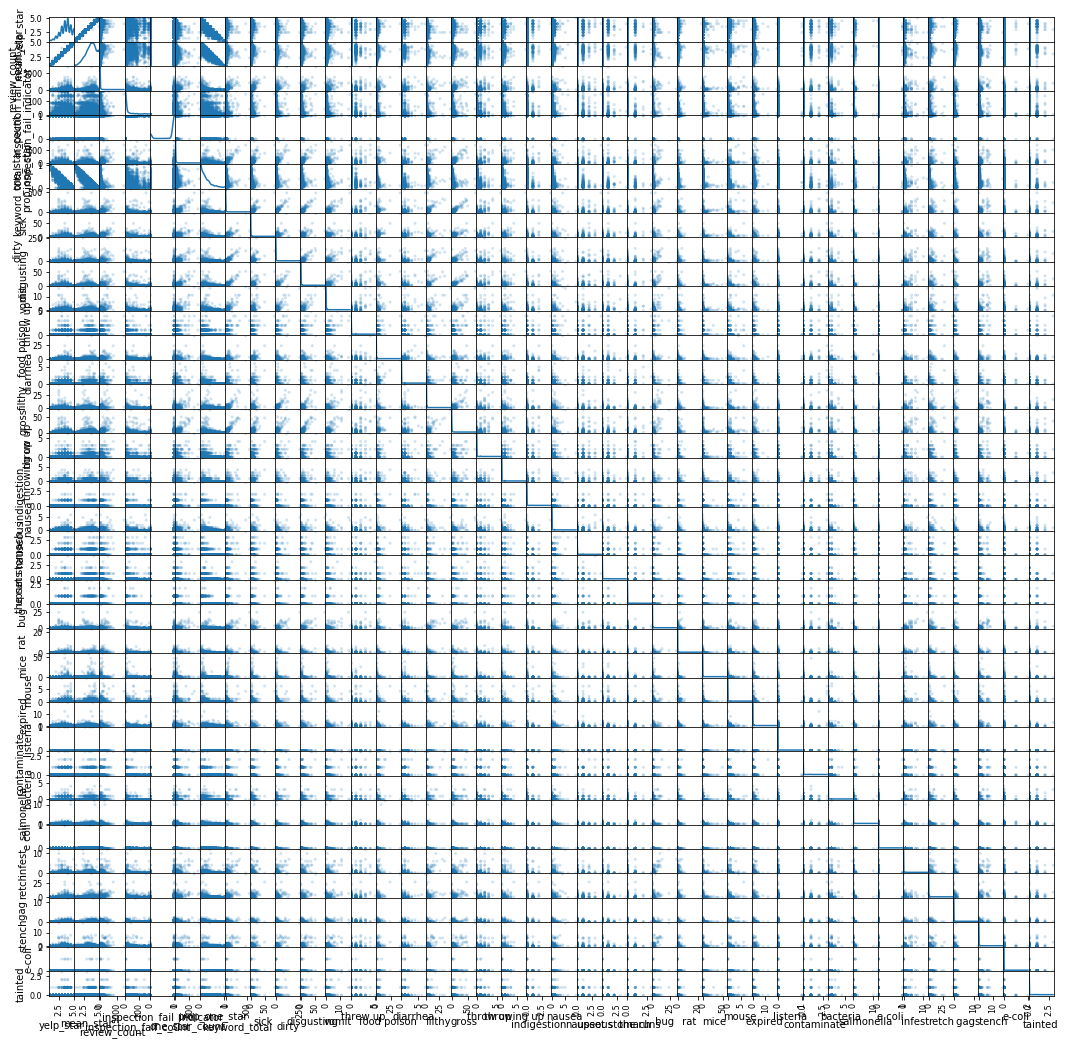

In [6]:
scatterMatrix = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(18, 18), diagonal='kde')

In [8]:
# Prep dataframes for models
X = df.drop(['business_id', 'address', 'name', 'demerit', 'grade', 'inspection_fail_count', 'inspection_fail_indicator', 'keyword_count'], axis=1)
Y_categorize = df[['inspection_fail_indicator']]
Y_regression = df[['inspection_fail_count']]

In [ ]:
####################
##   Regression   ##
####################

In [12]:
# Simple Linear Regression
lm = linear_model.LinearRegression()
scores = cross_val_score(lm, X, Y_regression, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.03 (+/- 0.05)


In [13]:
# K Nearest Neighbor Regression
Klist = []
for K in range(1,101):
    knn = KNeighborsRegressor(n_neighbors=K)
    Kscores = cross_val_score(knn, X, np.ravel(Y_regression), cv=10)
    Klist.append(Kscores.mean())
    if (K%10 == 0): 
        print(K)

10
20
30
40
50
60
70
80
90
100


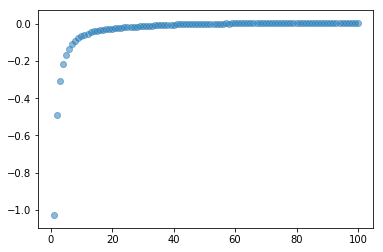

In [14]:
plt.scatter(range(1,101), Klist, alpha = 0.5)

In [ ]:
# Decision Trees

In [47]:
dtree = tree.DecisionTreeRegressor()
scores = cross_val_score(dtree, X, Y_regression, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -0.74 (+/- 0.33)


In [ ]:
# SVM

In [50]:
svr = svm.SVR()
scores = cross_val_score(svr, X, np.ravel(Y_regression), cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -0.11 (+/- 0.01)


In [ ]:
########################
##   Classification   ##
########################

In [15]:
# K Nearest Neighbor

Klist = []
for K in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=K)
    Kscores = cross_val_score(knn, X, np.ravel(Y_categorize), cv=10)
    Klist.append(Kscores.mean())
    if (K%10 == 0): 
        print(K)

10
20
30
40
50
60
70
80
90
100


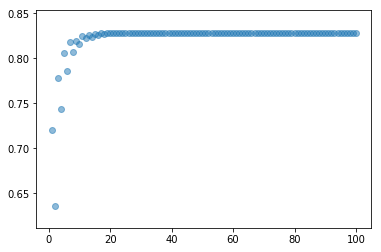

In [16]:
plt.scatter(range(1,101), Klist, alpha = 0.5)

In [17]:
# KNN K = 7
knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn, X, np.ravel(Y_categorize), cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.00)


In [ ]:
Y_categorize.sum()

In [40]:
# logistic regression
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, np.ravel(Y_categorize), cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.00)


In [ ]:
# LDA

In [35]:
lda = LinearDiscriminantAnalysis()
scores = cross_val_score(lda, X, np.ravel(Y_categorize), cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.00)


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn

In [ ]:
# QDA

In [36]:
qda = QuadraticDiscriminantAnalysis()
scores = cross_val_score(qda, X, np.ravel(Y_categorize), cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.24 (+/- 0.03)


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminan

In [ ]:
# Decision Trees

In [29]:
dtree = tree.DecisionTreeClassifier()
scores = cross_val_score(dtree, X, Y_categorize, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.73 (+/- 0.02)


In [ ]:
# SVM

In [46]:
svmModel = svm.SVC()
scores = cross_val_score(svmModel, X, np.ravel(Y_categorize), cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.00)


In [ ]:
scores.